In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

# suppress warnings
import warnings
warnings.filterwarnings("ignore")


cm_to_inch = lambda x: 0.3937 * x

colors = ['#0077BB', '#33BBEE', '#009988', '#EE7733', '#CC3311', '#EE3377', '#FFA500', '#BBBBBB']

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# decent dpi
plt.rcParams['figure.dpi'] = 200

# Figure 1

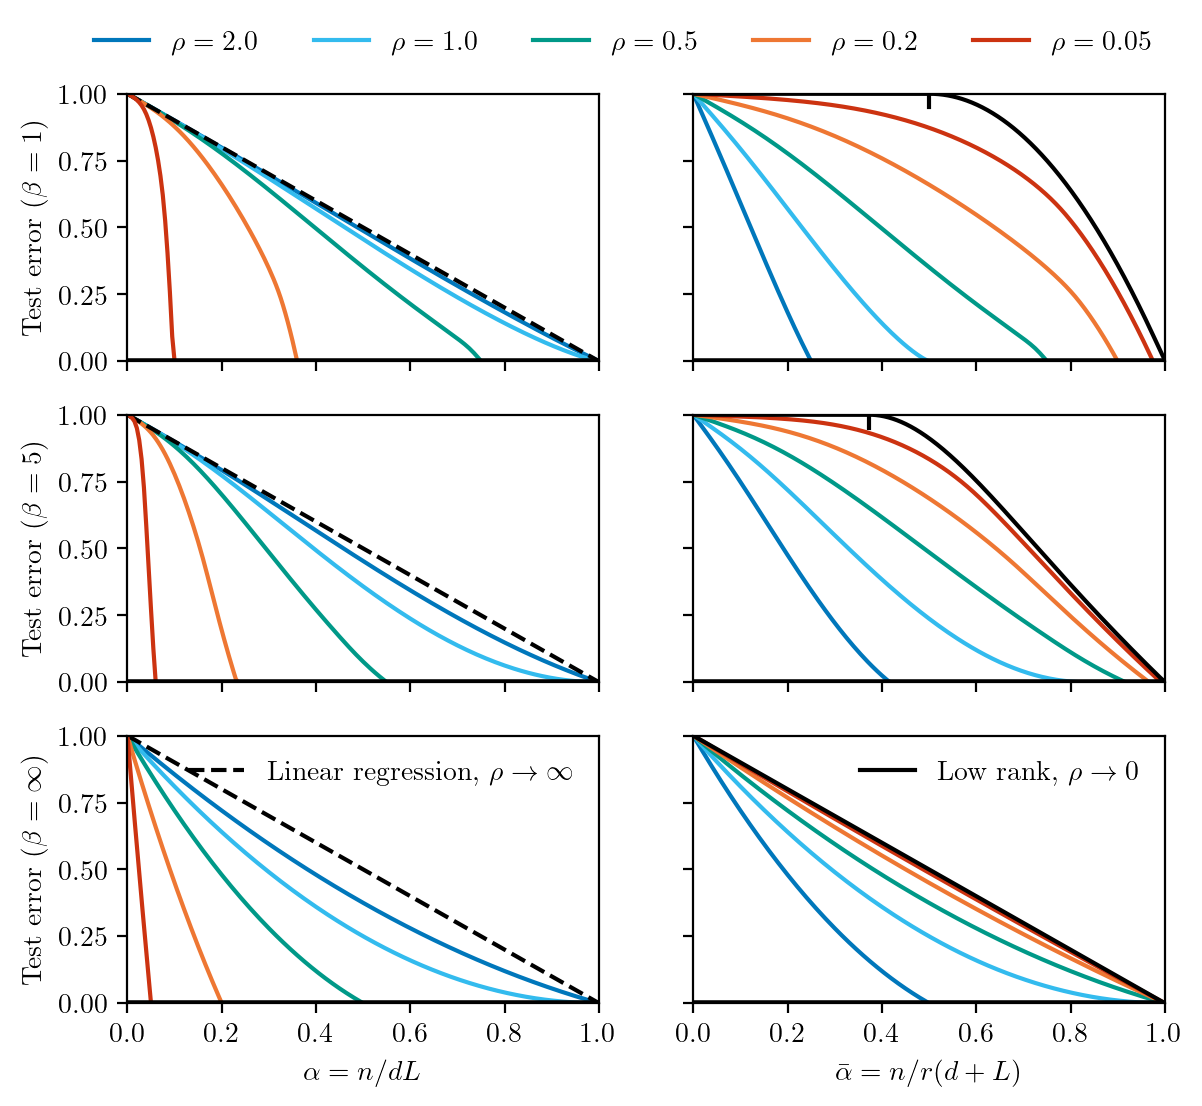

In [4]:
# I want to share the y and x axis
plt.subplots(3, 2, sharex='col', sharey='row', figsize=(cm_to_inch(8.5*2), cm_to_inch(5*3)))

plt.subplot(3, 2, 1)
plt.ylabel(r"Test error ($\beta = 1$)")


for i,rho in enumerate([2.0, 1.0, 0.5, 0.2]):
    df = pd.read_csv("Fig1/delta_0.0_beta_1.0_rho_[0.1, 0.2, 0.5, 1.0, 2.0]_alpha_0.0_0.005_1.0.csv")
    df = df[df["rho"] == rho]
    df = df.dropna()

    alpha_theory = df["alpha"].values
    gen_error_theory = df["mmse"].values 

    plt.plot(alpha_theory, gen_error_theory, label=fr"$\rho={rho}$", color=colors[i])

plt.plot(df["alpha"].values, df["mse_ridge_opt"].values, color="black", linestyle="--")

df = pd.read_csv("Fig1/delta_0.0_beta_1.0_rho_[0.05]_alpha_0.0_0.005_1.0.csv")
plt.plot(df["alpha"], df["mmse"], label=r"$\rho=0.05$", color=colors[4])



plt.ylim(0,1)
plt.xlim(0,1)
plt.axhline(0, color='black', lw=2)

plt.legend(frameon=False, loc='lower center', bbox_to_anchor=(1.05, 1.05), ncol=5, fontsize=10)

plt.subplot(3, 2, 2)

for i,rho in enumerate([2.0, 1.0, 0.5, 0.2]):
    df = pd.read_csv("Fig1/LR_delta_0.0_beta_1.0_rho_[0.1, 0.2, 0.5, 1.0, 2.0]_alphaLR_0.0_0.005_1.0.csv")
    df = df[df["rho"] == rho]
    df = df.dropna()

    alpha_theory = df["alpha_LR"].values
    gen_error_theory = df["mmse"].values 

    plt.plot(alpha_theory, gen_error_theory, label=fr"$\rho={round(rho,3)}$", color=colors[i])

df = pd.read_csv("Fig1/LR_delta_0.0_beta_1.0_rho_[0.0, 0.05]_alphaLR_0.0_0.001_1.0.csv")
df = df[df["rho"] == 0.05]
plt.plot(df["alpha_LR"], df["mmse"], label=r"$\rho=0.05$", color=colors[4])

df = pd.read_csv("Fig1/LR_delta_0.0_beta_1.0_rho_[0.0, 0.05]_alphaLR_0.0_0.001_1.0.csv")
df = df[df["rho"] == 0.0]
plt.plot(df["alpha_LR"], df["mmse"], color="black")

plt.axvline(1/2, color='black', linestyle='-', ymax=1, ymin=0.95)

plt.ylim(0,1)
plt.xlim(0,1)
plt.axhline(0, color='black', lw=2)


plt.subplot(3, 2, 3)
plt.ylabel(r"Test error ($\beta = 5$)")

for i,rho in enumerate([2.0, 1.0, 0.5, 0.2]):
    df = pd.read_csv("Fig1/delta_0.0_beta_5.0_rho_[0.1, 0.2, 0.5, 1.0, 2.0]_alpha_0.0_0.005_1.0.csv")
    df = df[df["rho"] == rho]
    df = df.dropna()

    alpha_theory = df["alpha"].values
    gen_error_theory = df["mmse"].values 

    plt.plot(alpha_theory, gen_error_theory, label=fr"$\rho={rho}$", color=colors[i])

plt.plot(df["alpha"].values, df["mse_ridge_opt"].values, color="black", label="Ridge regression", linestyle="--")

df = pd.read_csv("Fig1/delta_0.0_beta_5.0_rho_[0.05]_alpha_0.0_0.005_1.0.csv")
plt.plot(df["alpha"], df["mmse"], label=r"$\rho=0.05$", color=colors[4])

plt.ylim(0,1)
plt.xlim(0,1)
plt.axhline(0, color='black', lw=2)

plt.subplot(3, 2, 4)

for i,rho in enumerate([2.0, 1.0, 0.5, 0.2]):
    df = pd.read_csv("Fig1/LR_delta_0.0_beta_5.0_rho_[0.1, 0.2, 0.5, 1.0, 2.0]_alphaLR_0.0_0.005_1.0.csv")
    df = df[df["rho"] == rho]

    alpha_theory = df["alpha_LR"].values
    gen_error_theory = df["mmse"].values 
    df = df.dropna()

    plt.plot(alpha_theory, gen_error_theory, label=fr"$\rho={rho}$", color=colors[i])

df = pd.read_csv("Fig1/LR_delta_0.0_beta_5.0_rho_[0.0, 0.05]_alphaLR_0.0_0.001_1.0.csv")
df = df[df["rho"] == 0.05]
plt.plot(df["alpha_LR"], df["mmse"], label=r"$\rho=0.05$", color=colors[4])

df = pd.read_csv("Fig1/LR_delta_0.0_beta_5.0_rho_[0.0, 0.05]_alphaLR_0.0_0.001_1.0.csv")
df = df[df["rho"] == 0.0]
plt.plot(df["alpha_LR"], df["mmse"], color="black")

# make the vline a small vertical line that starts from the top of the picture and goes a bit down

plt.ylim(0,1)

plt.axvline(np.sqrt(5)/(1+5), color='black', linestyle='-', ymax=1, ymin=0.95)

plt.xlim(0,1)
plt.axhline(0, color='black', lw=2)


plt.subplot(3, 2, 5)
plt.ylabel(r"Test error ($\beta = \infty$)")
plt.xlabel(r"$\alpha=n/dL$")


for i,rho in enumerate([2.0, 1.0, 0.5, 0.2]):
    df = pd.read_csv("Fig1/delta_0.0_beta_inf_rho_[0.1, 0.2, 0.5, 1.0, 2.0]_alpha_0.0_0.005_1.0.csv")
    df = df[df["rho"] == rho]
    df = df.dropna()

    alpha_theory = df["alpha"].values
    gen_error_theory = df["mmse"].values 

    plt.plot(alpha_theory, gen_error_theory, color=colors[i])

plt.plot(df["alpha"].values, df["mse_ridge_opt"].values, color="black", label=r"Linear regression, $\rho\to \infty$", linestyle="--")

df = pd.read_csv("Fig1/delta_0.0_beta_inf_rho_[0.05]_alpha_0.0_0.001_1.0.csv")
plt.plot(df["alpha"], df["mmse"], color=colors[4])

plt.legend(frameon=False)

plt.ylim(0,1)
plt.xlim(0,1)
plt.axhline(0, color='black', lw=2)

plt.subplot(3, 2, 6)
plt.xlabel(r"$\bar\alpha=n/r(d+L)$")

for i,rho in enumerate([2.0, 1.0, 0.5, 0.2]):
    df = pd.read_csv("Fig1/LR_delta_0.0_beta_inf_rho_[0.1, 0.2, 0.5, 1.0, 2.0]_alpha_0.0_0.005_1.0.csv")
    df = df[df["rho"] == rho]
    df = df.dropna()

    alpha_theory = df["alpha_LR"].values
    gen_error_theory = df["mmse"].values 

    plt.plot(alpha_theory, gen_error_theory, color=colors[i])

df = pd.read_csv("Fig1/LR_delta_0.0_beta_inf_rho_[0.0, 0.05]_alpha_0.0_0.001_1.0.csv")
df = df[df["rho"] == 0.05]
plt.plot(df["alpha_LR"], df["mmse"], color=colors[4])

df = pd.read_csv("Fig1/LR_delta_0.0_beta_inf_rho_[0.0, 0.05]_alpha_0.0_0.001_1.0.csv")
df = df[df["rho"] == 0.0]
plt.plot(df["alpha_LR"], df["mmse"], color="black", label=r"Low rank, $\rho\to 0$")

plt.legend(frameon=False)
plt.ylim(0,1)
plt.xlim(0,1)
plt.axhline(0, color='black', lw=2)

plt.savefig("img/Fig1.pdf", bbox_inches='tight')

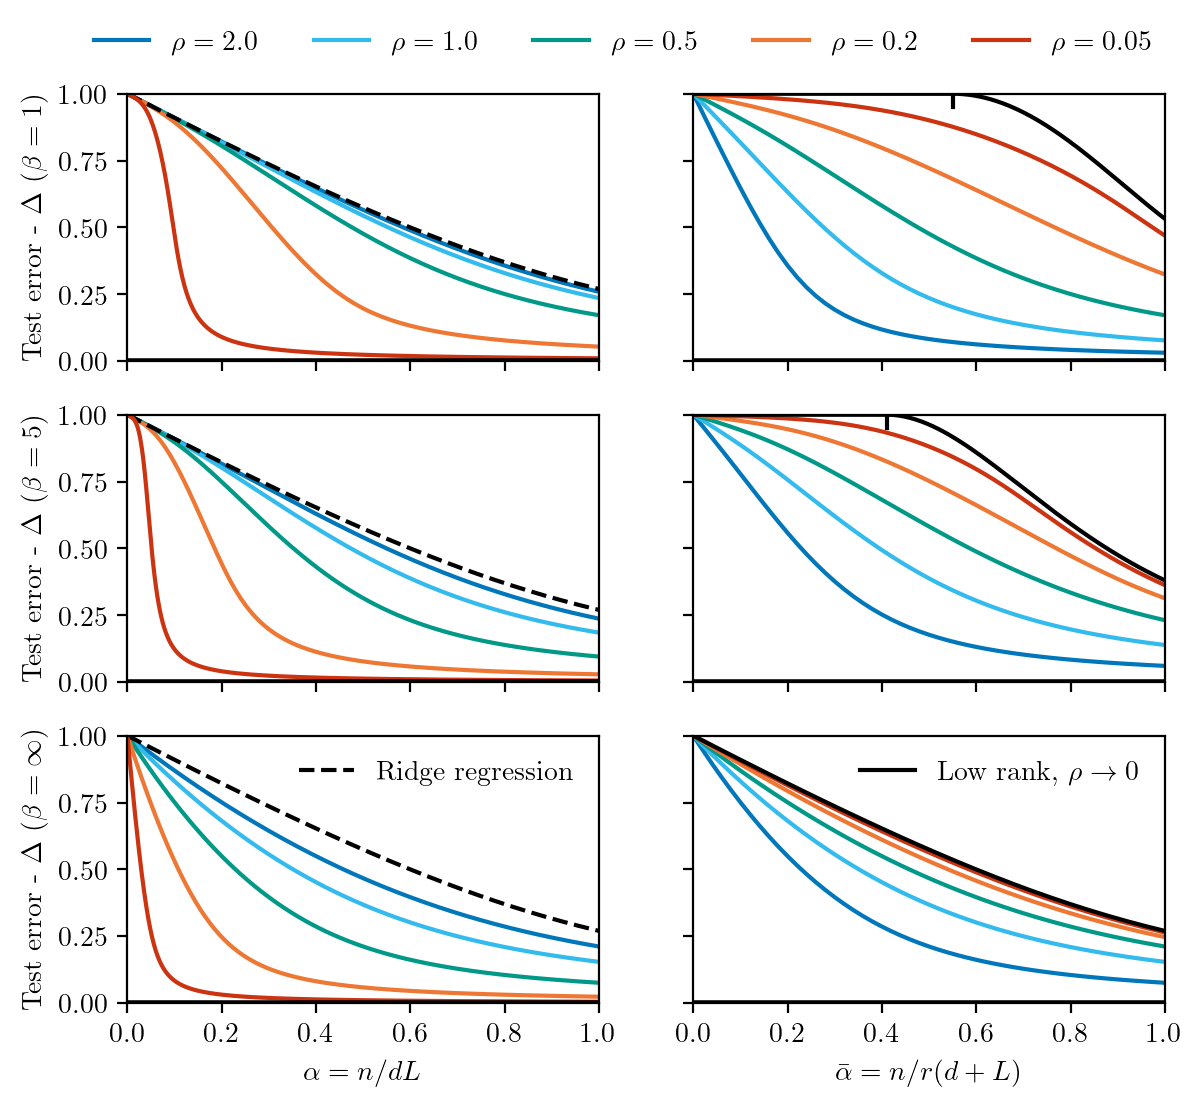

In [5]:
# I want to share the y and x axis
plt.subplots(3, 2, sharex='col', sharey='row', figsize=(cm_to_inch(8.5*2), cm_to_inch(5*3)))

plt.subplot(3, 2, 1)
plt.ylabel(r"Test error - $\Delta$ ($\beta = 1$)")


for i,rho in enumerate([2.0, 1.0, 0.5, 0.2]):
    df = pd.read_csv("Fig1Noisy/delta_0.1_beta_1.0_rho_[0.1, 0.2, 0.5, 1.0, 2.0]_alpha_0.0_0.005_1.0.csv")
    df = df[df["rho"] == rho]
    df = df.dropna()

    alpha_theory = df["alpha"].values
    gen_error_theory = df["mmse"].values 

    plt.plot(alpha_theory, gen_error_theory, label=fr"$\rho={rho}$", color=colors[i])

plt.plot(df["alpha"].values, df["mse_ridge_opt"].values, color="black", linestyle="--")

df = pd.read_csv("Fig1Noisy/delta_0.1_beta_1.0_rho_[0.05]_alpha_0.0_0.001_1.0.csv")
plt.plot(df["alpha"], df["mmse"], label=r"$\rho=0.05$", color=colors[4])



plt.ylim(0,1)
plt.xlim(0,1)
plt.axhline(0, color='black', lw=2)

plt.legend(frameon=False, loc='lower center', bbox_to_anchor=(1.05, 1.05), ncol=5, fontsize=10)

plt.subplot(3, 2, 2)

for i,rho in enumerate([2.0, 1.0, 0.5, 0.2]):
    df = pd.read_csv("Fig1Noisy/LR_delta_0.1_beta_1.0_rho_[0.1, 0.2, 0.5, 1.0, 2.0]_alphaLR_0.0_0.02_1.0.csv")
    df = df[df["rho"] == rho]
    df = df.dropna()

    alpha_theory = df["alpha_LR"].values
    gen_error_theory = df["mmse"].values 

    plt.plot(alpha_theory, gen_error_theory, label=fr"$\rho={round(rho,3)}$", color=colors[i])

df = pd.read_csv("Fig1Noisy/LR_delta_0.1_beta_1.0_rho_[0.0, 0.05]_alphaLR_0.0_0.004_1.0.csv")
df = df[df["rho"] == 0.05]
plt.plot(df["alpha_LR"], df["mmse"], label=r"$\rho=0.05$", color=colors[4])

df = pd.read_csv("Fig1Noisy/LR_delta_0.1_beta_1.0_rho_[0.0, 0.05]_alphaLR_0.0_0.004_1.0.csv")
df = df[df["rho"] == 0.0]
plt.plot(df["alpha_LR"], df["mmse"], color="black")

plt.axvline((1+0.1)/2, color='black', linestyle='-', ymax=1, ymin=0.95)

plt.ylim(0,1)
plt.xlim(0,1)
plt.axhline(0, color='black', lw=2)


plt.subplot(3, 2, 3)
plt.ylabel(r"Test error - $\Delta$ ($\beta = 5$)")

for i,rho in enumerate([2.0, 1.0, 0.5, 0.2]):
    df = pd.read_csv("Fig1Noisy/delta_0.1_beta_5.0_rho_[0.1, 0.2, 0.5, 1.0, 2.0]_alpha_0.0_0.005_1.0.csv")
    df = df[df["rho"] == rho]
    df = df.dropna()

    alpha_theory = df["alpha"].values
    gen_error_theory = df["mmse"].values 

    plt.plot(alpha_theory, gen_error_theory, label=fr"$\rho={rho}$", color=colors[i])

plt.plot(df["alpha"].values, df["mse_ridge_opt"].values, color="black", label=r"Ridge regression, $\rho\to\infty", linestyle="--")

df = pd.read_csv("Fig1Noisy/delta_0.1_beta_5.0_rho_[0.05]_alpha_0.0_0.001_1.0.csv")
plt.plot(df["alpha"], df["mmse"], label=r"$\rho=0.05$", color=colors[4])

plt.ylim(0,1)
plt.xlim(0,1)
plt.axhline(0, color='black', lw=2)

plt.subplot(3, 2, 4)

for i,rho in enumerate([2.0, 1.0, 0.5, 0.2]):
    df = pd.read_csv("Fig1Noisy/LR_delta_0.1_beta_5.0_rho_[0.1, 0.2, 0.5, 1.0, 2.0]_alphaLR_0.0_0.02_1.0.csv")
    df = df[df["rho"] == rho]

    alpha_theory = df["alpha_LR"].values
    gen_error_theory = df["mmse"].values 
    df = df.dropna()

    plt.plot(alpha_theory, gen_error_theory, label=fr"$\rho={rho}$", color=colors[i])

df = pd.read_csv("Fig1Noisy/LR_delta_0.1_beta_5.0_rho_[0.0, 0.05]_alphaLR_0.0_0.004_1.0.csv")
df = df[df["rho"] == 0.05]
plt.plot(df["alpha_LR"], df["mmse"], label=r"$\rho=0.05$", color=colors[4])

df = pd.read_csv("Fig1Noisy/LR_delta_0.1_beta_5.0_rho_[0.0, 0.05]_alphaLR_0.0_0.004_1.0.csv")
df = df[df["rho"] == 0.0]
plt.plot(df["alpha_LR"], df["mmse"], color="black")

plt.axvline((1+0.1)*np.sqrt(5)/(1+5), color='black', linestyle='-', ymax=1, ymin=0.95)

plt.ylim(0,1)
plt.xlim(0,1)
plt.axhline(0, color='black', lw=2)


plt.subplot(3, 2, 5)
plt.ylabel(r"Test error - $\Delta$ ($\beta = \infty$)")
plt.xlabel(r"$\alpha=n/dL$")


for i,rho in enumerate([2.0, 1.0, 0.5, 0.2]):
    df = pd.read_csv("Fig1Noisy/delta_0.1_beta_inf_rho_[0.1, 0.2, 0.5, 1.0, 2.0]_alpha_0.0_0.005_1.0.csv")
    df = df[df["rho"] == rho]
    df = df.dropna()

    alpha_theory = df["alpha"].values
    gen_error_theory = df["mmse"].values 

    plt.plot(alpha_theory, gen_error_theory, color=colors[i])

plt.plot(df["alpha"].values, df["mse_ridge_opt"].values, color="black", label="Ridge regression", linestyle="--")

df = pd.read_csv("Fig1Noisy/delta_0.1_beta_inf_rho_[0.05]_alpha_0.0_0.001_1.0.csv")
plt.plot(df["alpha"], df["mmse"], color=colors[4])

plt.ylim(0,1)
plt.xlim(0,1)
plt.axhline(0, color='black', lw=2)

plt.legend(frameon=False)
plt.subplot(3, 2, 6)
plt.xlabel(r"$\bar\alpha=n/r(d+L)$")

for i,rho in enumerate([2.0, 1.0, 0.5, 0.2]):
    df = pd.read_csv("Fig1Noisy/LR_delta_0.1_beta_inf_rho_[0.1, 0.2, 0.5, 1.0, 2.0]_alpha_0.0_0.02_1.0.csv")
    df = df[df["rho"] == rho]
    df = df.dropna()

    alpha_theory = df["alpha_LR"].values
    gen_error_theory = df["mmse"].values 

    plt.plot(alpha_theory, gen_error_theory, color=colors[i])

df = pd.read_csv("Fig1Noisy/LR_delta_0.1_beta_inf_rho_[0.0, 0.05]_alpha_0.0_0.04_1.0.csv")
df = df[df["rho"] == 0.05]
plt.plot(df["alpha_LR"], df["mmse"], color=colors[4])

df = pd.read_csv("Fig1Noisy/LR_delta_0.1_beta_inf_rho_[0.0, 0.05]_alpha_0.0_0.04_1.0.csv")
df = df[df["rho"] == 0.0]
plt.plot(df["alpha_LR"], df["mmse"], color="black", label=r"Low rank, $\rho\to 0$")
plt.legend(frameon=False)

plt.ylim(0,1)
plt.xlim(0,1)
plt.axhline(0, color='black', lw=2)

plt.savefig("img/Fig1Noisy.pdf", bbox_inches='tight')

# Figure 2

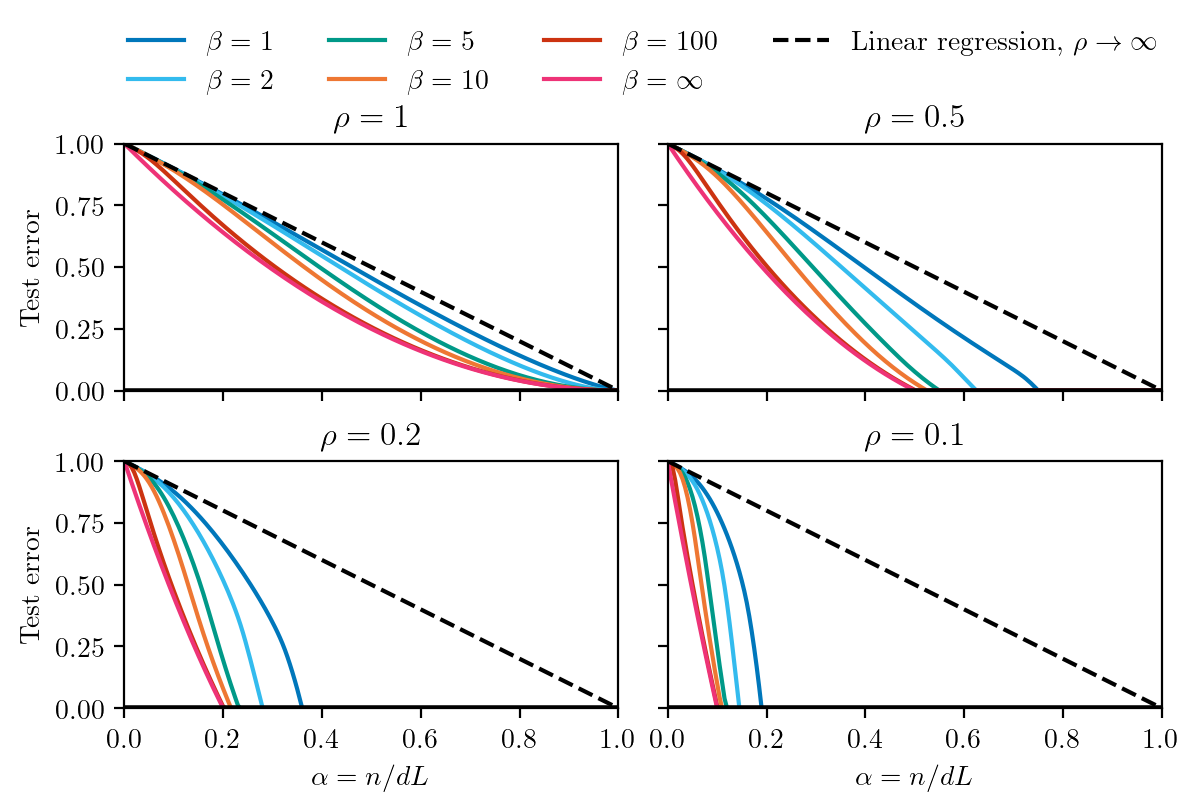

In [6]:
# I want to share the y and x axis
fig, ax = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(cm_to_inch(8.5*2), cm_to_inch(5*2)))

aspect = 0.5
ax[0,0].set_aspect(aspect)
ax[0,1].set_aspect(aspect)
ax[1,0].set_aspect(aspect)
ax[1,1].set_aspect(aspect)

# add space above the plots, remove between
plt.subplots_adjust(hspace=0.1, wspace=0.1)

plt.subplot(2, 2, 1)

for i,beta in enumerate([1.0, 2.0, 5.0, 10.0, 100.0, np.inf]):
    df = pd.read_csv("Fig2/delta_0.0_beta_[1.0, 2.0, 5.0, 10.0, 100.0, 1000.0, Inf]_rho_1_alpha_0.0_0.005_1.0.csv")
    df = df[df["beta"] == beta]
    df = df.dropna()

    alpha_theory = df["alpha"].values
    gen_error_theory = df["mmse"].values 

    if beta != np.inf:
        plt.plot(alpha_theory, gen_error_theory, label=fr"$\beta={int(beta)}$", color=colors[i])
    else:
        plt.plot(alpha_theory, gen_error_theory, label=fr"$\beta=\infty$", color=colors[i], linestyle="-")

plt.plot(df["alpha"].values, df["mse_ridge_opt"].values, color="black", label=r"Linear regression, $\rho\to\infty$", linestyle="--")

plt.legend(frameon=False, loc='lower center', bbox_to_anchor=(1.05, 1.1), ncol=4, fontsize=10)

plt.xlim(0,1)
plt.ylim(0,1)
plt.axhline(0, color='black', lw=2)
plt.ylabel(r"Test error")
plt.title(r"$\rho = 1$")

plt.subplot(2, 2, 2)

for i,beta in enumerate([1.0, 2.0, 5.0, 10.0, 100.0, np.inf]):
    df = pd.read_csv("Fig2/delta_0.0_beta_[1.0, 2.0, 5.0, 10.0, 100.0, 1000.0, Inf]_rho_0.5_alpha_0.0_0.005_1.0.csv")
    df = df[df["beta"] == beta]
    df = df.dropna()

    alpha_theory = df["alpha"].values
    gen_error_theory = df["mmse"].values 

    if beta != np.inf:
        plt.plot(alpha_theory, gen_error_theory, label=fr"$\beta={int(beta)}$", color=colors[i])
    else:
        plt.plot(alpha_theory, gen_error_theory, label=fr"$\beta=\infty$", color=colors[i], linestyle="-")

plt.plot(df["alpha"].values, df["mse_ridge_opt"].values, color="black", label="Ridge regression", linestyle="--")

plt.axhline(0, color='black', lw=2)
plt.title(r"$\rho = 0.5$")

plt.subplot(2, 2, 3)

plt.xlim(0,1)
plt.ylim(0,1)

for i,beta in enumerate([1.0, 2.0, 5.0, 10.0, 100.0, np.inf]):
    df = pd.read_csv("Fig2/delta_0.0_beta_[1.0, 2.0, 5.0, 10.0, 100.0, 1000.0, Inf]_rho_0.2_alpha_0.0_0.005_1.0.csv")
    df = df[df["beta"] == beta]
    df = df.dropna()

    alpha_theory = df["alpha"].values
    gen_error_theory = df["mmse"].values 

    if beta != np.inf:
        plt.plot(alpha_theory, gen_error_theory, label=fr"$\beta={int(beta)}$", color=colors[i])
    else:
        plt.plot(alpha_theory, gen_error_theory, label=fr"$\beta=\infty$", color=colors[i], linestyle="-")

plt.plot(df["alpha"].values, df["mse_ridge_opt"].values, color="black", label="Ridge regression", linestyle="--")

plt.axhline(0, color='black', lw=2)
plt.xlabel(r"$\alpha=n/dL$")
plt.ylabel(r"Test error")

plt.title(r"$\rho = 0.2$")

plt.subplot(2, 2, 4)

for i,beta in enumerate([1.0, 2.0, 5.0, 10.0, 100.0, np.inf]):
    df = pd.read_csv("Fig2/delta_0.0_beta_[1.0, 2.0, 5.0, 10.0, 100.0, 1000.0, Inf]_rho_0.1_alpha_0.0_0.005_1.0.csv")
    df = df[df["beta"] == beta]
    df = df.dropna()

    alpha_theory = df["alpha"].values
    gen_error_theory = df["mmse"].values 

    if beta != np.inf:
        plt.plot(alpha_theory, gen_error_theory, label=fr"$\beta={int(beta)}$", color=colors[i])
    else:
        plt.plot(alpha_theory, gen_error_theory, label=fr"$\beta=\infty$", color=colors[i], linestyle="-")

plt.plot(df["alpha"].values, df["mse_ridge_opt"].values, color="black", label=r"Linear regression, $\rho\to\infty$", linestyle="--")


plt.axhline(0, color='black', lw=2)

plt.xlabel(r"$\alpha=n/dL$")
plt.title(r"$\rho = 0.1$")
plt.xlim(0,1)


plt.savefig("img/Fig2.pdf")

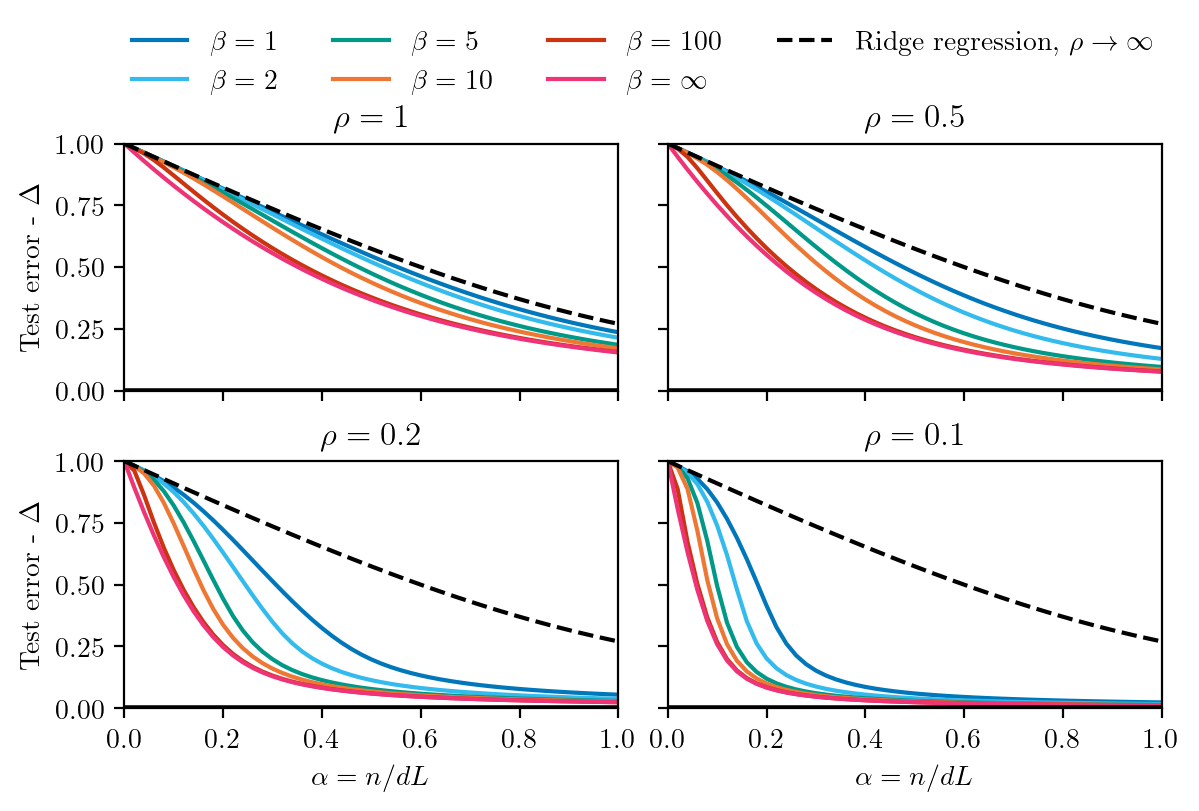

In [7]:
# I want to share the y and x axis
fig, ax = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(cm_to_inch(8.5*2), cm_to_inch(5*2)))

aspect = 0.5
ax[0,0].set_aspect(aspect)
ax[0,1].set_aspect(aspect)
ax[1,0].set_aspect(aspect)
ax[1,1].set_aspect(aspect)

# add space above the plots, remove between
plt.subplots_adjust(hspace=0.1, wspace=0.1)

plt.subplot(2, 2, 1)


for i,beta in enumerate([1.0, 2.0, 5.0, 10.0, 100.0, np.inf]):
    df = pd.read_csv("Fig2Noisy/delta_0.1_beta_[1.0, 2.0, 5.0, 10.0, 100.0, 1000.0, Inf]_rho_1_alpha_0.0_0.02_1.0.csv")
    df = df[df["beta"] == beta]
    df = df.dropna()

    alpha_theory = df["alpha"].values
    gen_error_theory = df["mmse"].values 

    if beta != np.inf:
        plt.plot(alpha_theory, gen_error_theory, label=fr"$\beta={int(beta)}$", color=colors[i])
    else:
        plt.plot(alpha_theory, gen_error_theory, label=fr"$\beta=\infty$", color=colors[i], linestyle="-")

plt.plot(df["alpha"].values, df["mse_ridge_opt"].values, color="black", label=r"Ridge regression, $\rho\to\infty$", linestyle="--")


plt.legend(frameon=False, loc='lower center', bbox_to_anchor=(1.05, 1.1), ncol=4, fontsize=10)

plt.xlim(0,1)
plt.ylim(0,1)
plt.axhline(0, color='black', lw=2)
plt.ylabel(r"Test error - $\Delta$")
plt.title(r"$\rho = 1$")


plt.subplot(2, 2, 2)

for i,beta in enumerate([1.0, 2.0, 5.0, 10.0, 100.0, np.inf]):
    df = pd.read_csv("Fig2Noisy/delta_0.1_beta_[1.0, 2.0, 5.0, 10.0, 100.0, 1000.0, Inf]_rho_0.5_alpha_0.0_0.02_1.0.csv")
    df = df[df["beta"] == beta]
    df = df.dropna()

    alpha_theory = df["alpha"].values
    gen_error_theory = df["mmse"].values 

    if beta != np.inf:
        plt.plot(alpha_theory, gen_error_theory, label=fr"$\beta={int(beta)}$", color=colors[i])
    else:
        plt.plot(alpha_theory, gen_error_theory, label=fr"$\beta=\infty$", color=colors[i], linestyle="-")

plt.plot(df["alpha"].values, df["mse_ridge_opt"].values, color="black", label="Ridge regression", linestyle="--")


plt.axhline(0, color='black', lw=2)
plt.title(r"$\rho = 0.5$")

plt.subplot(2, 2, 3)

plt.xlim(0,1)
plt.ylim(0,1)

for i,beta in enumerate([1.0, 2.0, 5.0, 10.0, 100.0, np.inf]):
    df = pd.read_csv("Fig2Noisy/delta_0.1_beta_[1.0, 2.0, 5.0, 10.0, 100.0, 1000.0, Inf]_rho_0.2_alpha_0.0_0.02_1.0.csv")
    df = df[df["beta"] == beta]
    df = df.dropna()

    alpha_theory = df["alpha"].values
    gen_error_theory = df["mmse"].values 

    if beta != np.inf:
        plt.plot(alpha_theory, gen_error_theory, label=fr"$\beta={int(beta)}$", color=colors[i])
    else:
        plt.plot(alpha_theory, gen_error_theory, label=fr"$\beta=\infty$", color=colors[i], linestyle="-")

plt.plot(df["alpha"].values, df["mse_ridge_opt"].values, color="black", label="Ridge regression", linestyle="--")

plt.axhline(0, color='black', lw=2)
plt.xlabel(r"$\alpha=n/dL$")
plt.ylabel(r"Test error - $\Delta$")
plt.title(r"$\rho = 0.2$")


plt.subplot(2, 2, 4)

for i,beta in enumerate([1.0, 2.0, 5.0, 10.0, 100.0, np.inf]):
    df = pd.read_csv("Fig2Noisy/delta_0.1_beta_[1.0, 2.0, 5.0, 10.0, 100.0, 1000.0, Inf]_rho_0.1_alpha_0.0_0.02_1.0.csv")
    df = df[df["beta"] == beta]
    df = df.dropna()

    alpha_theory = df["alpha"].values
    gen_error_theory = df["mmse"].values 

    if beta != np.inf:
        plt.plot(alpha_theory, gen_error_theory, label=fr"$\beta={int(beta)}$", color=colors[i])
    else:
        plt.plot(alpha_theory, gen_error_theory, label=fr"$\beta=\infty$", color=colors[i], linestyle="-")

plt.plot(df["alpha"].values, df["mse_ridge_opt"].values, color="black", label="Ridge regression", linestyle="--")

plt.axhline(0, color='black', lw=2)

plt.xlabel(r"$\alpha=n/dL$")
plt.title(r"$\rho = 0.1$")

plt.xlim(0,1)
plt.savefig("img/Fig2Noisy.pdf")

# Figure 3

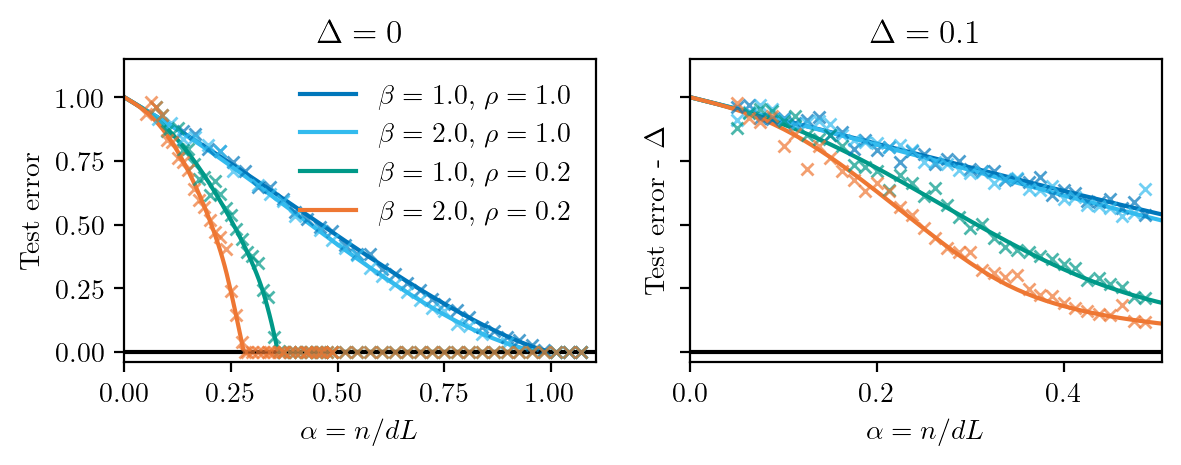

In [15]:
# Two plots in a figure. The size of each plot is 17 cm horizontal and 8 cm vertical
plt.subplots(1, 2, sharey='row', figsize=(cm_to_inch(8.5*2), cm_to_inch(5)))


plt.subplot(1, 2, 1)

rho = 1.0
beta = 1.0
delta = 0.0
color = colors[0]

df = pd.read_csv(f"AMP/AMP_rho_{rho}_beta_{beta}_delta_{delta}_D_{100}.csv")
alpha_sim = df["alpha"].values
gen_error_single = df["mmse"].values
plt.errorbar(alpha_sim, gen_error_single, marker="x", linestyle="", color=color, markersize=4, alpha=0.7)

df = pd.read_csv("MiscTheory/delta_0.0_beta_[1.0, 2.0]_rho_[0.2, 1.0]_alpha_0.0_0.005_1.0.csv")

MMSE = df[df["rho"]==rho][df["beta"]==beta][df["delta"]==delta]["mmse"].values
alphas = df[df["rho"]==rho][df["beta"]==beta][df["delta"]==delta]["alpha"].values
plt.plot(alphas, MMSE, label=fr"$\beta = {beta}$, $\rho = {rho}$", color=color)


rho = 1.0
beta = 2.0
delta = 0.0
color = colors[1]

df = pd.read_csv(f"AMP/AMP_rho_{rho}_beta_{beta}_delta_{delta}_D_{100}.csv")
alpha_sim = df["alpha"].values
gen_error_single = df["mmse"].values
plt.errorbar(alpha_sim, gen_error_single, marker="x", linestyle="", color=color, markersize=4, alpha=0.7)

df = pd.read_csv("MiscTheory/delta_0.0_beta_[1.0, 2.0]_rho_[0.2, 1.0]_alpha_0.0_0.005_1.0.csv")

MMSE = df[df["rho"]==rho][df["beta"]==beta][df["delta"]==delta]["mmse"].values
alphas = df[df["rho"]==rho][df["beta"]==beta][df["delta"]==delta]["alpha"].values
plt.plot(alphas, MMSE, label=fr"$\beta = {beta}$, $\rho = {rho}$", color=color)


rho = 0.2
beta = 1.0
delta = 0.0
color = colors[2]

df = pd.read_csv(f"AMP/AMP_rho_{rho}_beta_{beta}_delta_{delta}_D_{100}.csv")
alpha_sim = df["alpha"].values
gen_error_single = df["mmse"].values
plt.errorbar(alpha_sim, gen_error_single, marker="x", linestyle="", color=color, markersize=4, alpha=0.7)

df = pd.read_csv("MiscTheory/delta_0.0_beta_[1.0, 2.0]_rho_[0.2, 1.0]_alpha_0.0_0.005_1.0.csv")

MMSE = df[df["rho"]==rho][df["beta"]==beta][df["delta"]==delta]["mmse"].values
alphas = df[df["rho"]==rho][df["beta"]==beta][df["delta"]==delta]["alpha"].values
plt.plot(alphas, MMSE, label=fr"$\beta = {beta}$, $\rho = {rho}$", color=color)


rho = 0.2
beta = 2.0
delta = 0.0
color = colors[3]

df = pd.read_csv(f"AMP/AMP_rho_{rho}_beta_{beta}_delta_{delta}_D_{100}.csv")
alpha_sim = df["alpha"].values
gen_error_single = df["mmse"].values
plt.errorbar(alpha_sim, gen_error_single, marker="x", linestyle="", color=color, markersize=4, alpha=0.7)

df = pd.read_csv("MiscTheory/delta_0.0_beta_[1.0, 2.0]_rho_[0.2, 1.0]_alpha_0.0_0.005_1.0.csv")

MMSE = df[df["rho"]==rho][df["beta"]==beta][df["delta"]==delta]["mmse"].values
alphas = df[df["rho"]==rho][df["beta"]==beta][df["delta"]==delta]["alpha"].values
plt.plot(alphas, MMSE, label=fr"$\beta = {beta}$, $\rho = {rho}$", color=color)


plt.legend(frameon=False)

plt.axhline(0, color='black', linestyle='-')
plt.ylabel("Test error")
plt.xlabel(r"$\alpha = n/dL$")
plt.title(f"$\Delta = 0$")
plt.xlim(0, 1.105)
plt.ylim(0,1.05)

plt.subplot(1, 2, 2)

rho = 1.0
beta = 1.0
delta = 0.1
color = colors[0]

df = pd.read_csv(f"AMP/AMP_rho_{rho}_beta_{beta}_delta_{delta}_D_{100}.csv")
alpha_sim = df["alpha"].values
gen_error_single = df["mmse"].values
plt.errorbar(alpha_sim, gen_error_single, marker="x", linestyle="", color=color, markersize=4, alpha=0.7)

df = pd.read_csv("MiscTheory/delta_0.1_beta_[1.0, 2.0]_rho_[0.2, 1.0]_alpha_0.0_0.01_2.0.csv")
MMSE = df[df["rho"]==rho][df["beta"]==beta][df["delta"]==delta]["mmse"].values
alphas = df[df["rho"]==rho][df["beta"]==beta][df["delta"]==delta]["alpha"].values
plt.plot(alphas, MMSE, label=fr"$\beta = {beta}$, $\rho = {rho}$", color=color)

rho = 1.0
beta = 2.0
delta = 0.1
color = colors[1]

df = pd.read_csv(f"AMP/AMP_rho_{rho}_beta_{beta}_delta_{delta}_D_{100}.csv")
alpha_sim = df["alpha"].values
gen_error_single = df["mmse"].values
plt.errorbar(alpha_sim, gen_error_single, marker="x", linestyle="", color=color, markersize=4, alpha=0.7)

df = pd.read_csv("MiscTheory/delta_0.1_beta_[1.0, 2.0]_rho_[0.2, 1.0]_alpha_0.0_0.01_2.0.csv")
MMSE = df[df["rho"]==rho][df["beta"]==beta][df["delta"]==delta]["mmse"].values
alphas = df[df["rho"]==rho][df["beta"]==beta][df["delta"]==delta]["alpha"].values
plt.plot(alphas, MMSE, label=fr"$\beta = {beta}$, $\rho = {rho}$", color=color)

rho = 0.2
beta = 1.0
delta = 0.1
color = colors[2]

df = pd.read_csv(f"AMP/AMP_rho_{rho}_beta_{beta}_delta_{delta}_D_{100}.csv")
alpha_sim = df["alpha"].values
gen_error_single = df["mmse"].values
plt.errorbar(alpha_sim, gen_error_single, marker="x", linestyle="", color=color, markersize=4, alpha=0.7)

df = pd.read_csv("MiscTheory/delta_0.1_beta_[1.0, 2.0]_rho_[0.2, 1.0]_alpha_0.0_0.01_2.0.csv")
MMSE = df[df["rho"]==rho][df["beta"]==beta][df["delta"]==delta]["mmse"].values
alphas = df[df["rho"]==rho][df["beta"]==beta][df["delta"]==delta]["alpha"].values
plt.plot(alphas, MMSE, label=fr"$\beta = {beta}$, $\rho = {rho}$", color=color)

rho = 0.2
beta = 2.0
delta = 0.1
color = colors[3]

df = pd.read_csv(f"AMP/AMP_rho_{rho}_beta_{beta}_delta_{delta}_D_{100}.csv")
alpha_sim = df["alpha"].values
gen_error_single = df["mmse"].values
plt.errorbar(alpha_sim, gen_error_single, marker="x", linestyle="", color=color, markersize=4, alpha=0.7)

df = pd.read_csv("MiscTheory/delta_0.1_beta_[1.0, 2.0]_rho_[0.2, 1.0]_alpha_0.0_0.01_2.0.csv")
MMSE = df[df["rho"]==rho][df["beta"]==beta][df["delta"]==delta]["mmse"].values
alphas = df[df["rho"]==rho][df["beta"]==beta][df["delta"]==delta]["alpha"].values
plt.plot(alphas, MMSE, label=fr"$\beta = {beta}$, $\rho = {rho}$", color=color)

plt.axhline(0, color='black', linestyle='-')
plt.ylabel(r"Test error - $\Delta$")
plt.xlabel(r"$\alpha = n/dL$")

plt.xlim(0,0.505)
plt.ylim(-.04,1.15)
plt.title(f"$\Delta = 0.1$")


plt.savefig("img/AMP_vs_MMSE.pdf", bbox_inches='tight')



# Figure 4

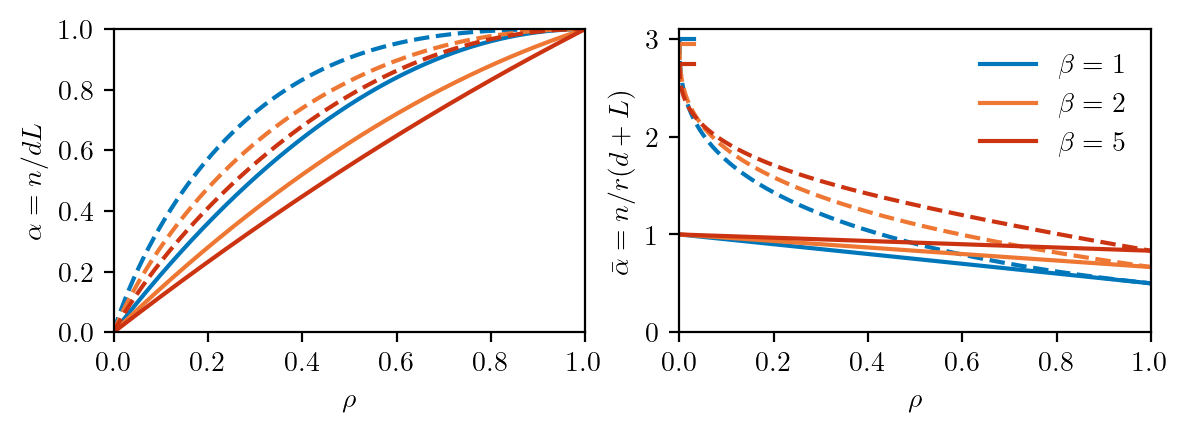

In [17]:
plt.subplots(1, 2, sharex='col', figsize=(cm_to_inch(8.5*2), cm_to_inch(5)))
plt.subplot(1, 2, 1)


beta_list = np.array([1.0, 2.0, 5.0])

i_choice = [0, 3, 4]
for i,beta in enumerate(beta_list):
    df = pd.read_csv("strong/MNNE_beta_[1, 2, 5, 10, 100]_rho_0.0_0.001_1.0.csv")
    df = df[df["beta"] == beta]
    df = df.dropna()

    plt.plot(df["rho"], df["alpha_BO"], label=fr"$\beta={beta}$", color=colors[i_choice[i]], linestyle="-")
    plt.plot(df["rho"], df["alpha_MNNE"], color=colors[i_choice[i]], linestyle="--")

# plt.legend(frameon=False, loc='lower center', bbox_to_anchor=(1.05, 1.1), ncol=6, fontsize=10)
# plt.legend(frameon=False)

plt.ylabel(r"$\alpha = n/dL$")
plt.xlabel(r"$\rho$")

plt.xlim(0,1)
plt.ylim(0,1)
plt.subplot(1, 2, 2)


beta_list = np.array([1.0, 2.0, 5.0])

i_choice = [0, 3, 4]
for i,beta in enumerate(beta_list):
    df = pd.read_csv("strong/MNNE_beta_[1, 2, 5, 10, 100]_rho_0.0_0.001_1.0.csv")
    df = df[df["beta"] == beta]
    df = df.dropna()

    plt.plot(df["rho"], df["alpha_LR_BO"], label=fr"$\beta={int(beta)}$", color=colors[i_choice[i]], linestyle="-")
    plt.plot(df["rho"], df["alpha_LR_MNNE"], color=colors[i_choice[i]], linestyle="--")

    plt.plot([0,0.03], 2*(1 + np.sqrt(beta)/(1+beta)) * np.ones(2), marker="", color=colors[i_choice[i]])

# plt.legend(frameon=False, loc='lower center', bbox_to_anchor=(1.05, 1.1), ncol=6, fontsize=10)
plt.legend(frameon=False)

plt.ylabel(r"$\bar\alpha = n/r(d+L)$")
plt.xlabel(r"$\rho$")

plt.xlim(0,1)
plt.ylim(0,3.1)
plt.savefig("img/strong.pdf", bbox_inches='tight')


# Figure 5

(16, 16)


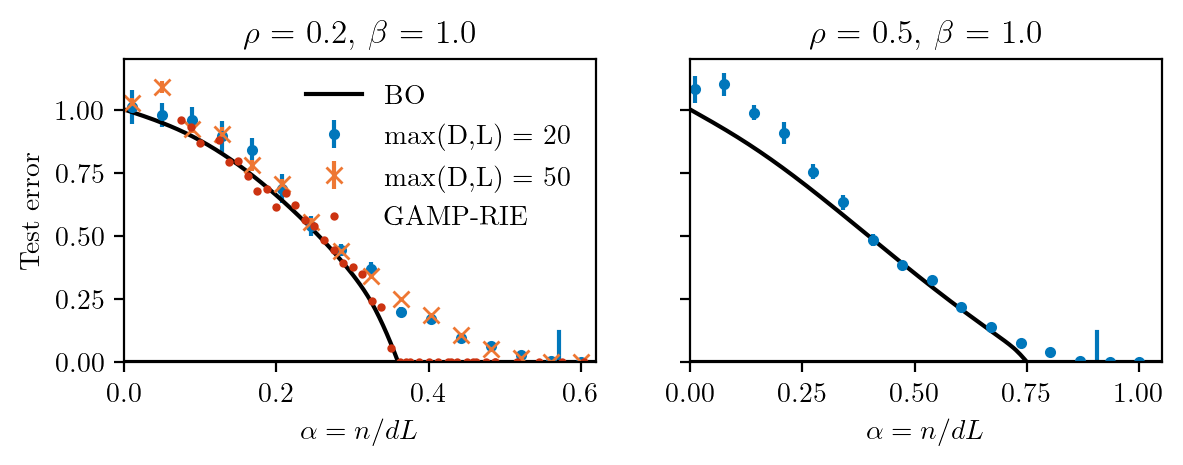

In [47]:
D = 20

plt.subplots(1, 2, sharex='col', sharey='row', figsize=(cm_to_inch(8.5*2), cm_to_inch(5)))

# Overall title
beta = 1.0
samples = 16

plt.subplot(1,2,2)
rho = 0.5
alpha_list = np.load(f"data_min_norm/alpha_D{D}R{rho}B{beta}.npy")
overlap_list = np.load(f"data_min_norm/MSE_D{D}R{rho}B{beta}.npy")

print(overlap_list.shape)

samples = overlap_list.shape[1]
plt.errorbar(alpha_list, overlap_list.mean(axis=1), overlap_list.std(axis=1)/np.sqrt(samples), marker=".", linestyle=" ", label="Minimum norm", color=colors[0])

df = pd.read_csv("Fig1/delta_0.0_beta_1.0_rho_[0.1, 0.2, 0.5, 1.0, 2.0]_alpha_0.0_0.005_1.0.csv")
df = df[df["rho"] == rho]
df = df.dropna()

alpha_theory = df["alpha"].values
gen_error_theory = df["mmse"].values 


plt.plot(alpha_theory, gen_error_theory, label="AMP", color="black")

plt.axvline(x=0.9054173332199507, color=colors[0], ymin=0, ymax=.1)
plt.axhline(0, color='black', linestyle='-')
plt.xlabel(r'$\alpha = n/dL$')

plt.title(rf'$\rho$ = {rho}, $\beta$ = {beta}')

plt.xlim((0,1.05))

plt.subplot(1,2,1)

rho = 0.2
beta = 1.0
delta = 0.0
color = colors[4]
D = 20

alpha_list = np.load(f"data_min_norm/alpha_D{D}R{rho}B{beta}.npy")
overlap_list = np.load(f"data_min_norm/MSE_D{D}R{rho}B{beta}.npy")

samples = overlap_list.shape[1]
plt.errorbar(alpha_list, overlap_list.mean(axis=1), overlap_list.std(axis=1)/np.sqrt(samples), marker=".", linestyle=" ", label="max(D,L) = 20", color=colors[0])

D = 50

alpha_list = np.load(f"data_min_norm/alpha_D{D}R{rho}B{beta}.npy")
overlap_list = np.load(f"data_min_norm/MSE_D{D}R{rho}B{beta}.npy")

samples = overlap_list.shape[1]
plt.errorbar(alpha_list, overlap_list.mean(axis=1), overlap_list.std(axis=1)/np.sqrt(samples), marker="x", linestyle=" ", label="max(D,L) = 50", color=colors[3])



df = pd.read_csv("Fig1/delta_0.0_beta_1.0_rho_[0.1, 0.2, 0.5, 1.0, 2.0]_alpha_0.0_0.005_1.0.csv")
df = df[df["rho"] == rho]
df = df.dropna()

alpha_theory = df["alpha"].values
gen_error_theory = df["mmse"].values 


plt.plot(alpha_theory, gen_error_theory, label="BO", color="black")


df = pd.read_csv(f"AMP/AMP_rho_{rho}_beta_{beta}_delta_{delta}_D_{100}.csv")
alpha_sim = df["alpha"].values
gen_error_single = df["mmse"].values
plt.errorbar(alpha_sim, gen_error_single, marker=".", linestyle="", color=color, markersize=4, label="GAMP-RIE")


plt.axvline(x=0.571689921145544, color=colors[0], ymin=0, ymax=.1)
plt.axhline(0, color='black', linestyle='-')
plt.ylim((0,1.2))
plt.xlim((0,0.62))
plt.xlabel(r'$\alpha = n/dL$')
plt.title(rf'$\rho$ = {rho}, $\beta$ = {beta}')
plt.legend(frameon=False)
plt.ylabel("Test error")

plt.savefig("img/BO_vs_MNNE.pdf", bbox_inches='tight')



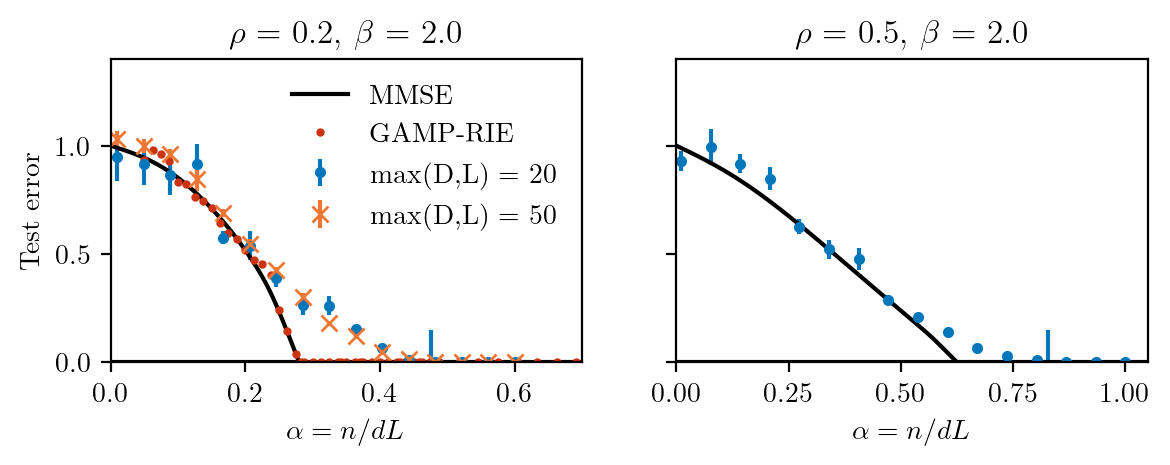

In [46]:
D = 20

plt.subplots(1, 2, sharex='col', sharey='row', figsize=(cm_to_inch(8.5*2), cm_to_inch(5)))

# Overall title
beta = 2.0
samples = 16

plt.subplot(1,2,2)
rho = 0.5
alpha_list = np.load(f"data_min_norm/alpha_D{D}R{rho}B{beta}.npy")
overlap_list = np.load(f"data_min_norm/MSE_D{D}R{rho}B{beta}.npy")


samples = overlap_list.shape[1]
plt.errorbar(alpha_list, overlap_list.mean(axis=1), overlap_list.std(axis=1)/np.sqrt(samples), marker=".", linestyle=" ", label="Minimum norm", color=colors[0])

df = pd.read_csv("Fig1/delta_0.0_beta_2.0_rho_[0.1, 0.2, 0.5, 1.0, 2.0]_alpha_0.0_0.005_1.0.csv")
df = df[df["rho"] == rho]
df = df.dropna()

alpha_theory = df["alpha"].values
gen_error_theory = df["mmse"].values 


plt.plot(alpha_theory, gen_error_theory, label="BO", color="black")

plt.axvline(x=0.8284921265079002, color=colors[0], ymin=0, ymax=.1)
plt.axhline(0, color='black', linestyle='-')
plt.xlabel(r'$\alpha = n/dL$')

plt.title(rf'$\rho$ = {rho}, $\beta$ = {2.}')

plt.xlim((0,1.05))

plt.subplot(1,2,1)


rho = 0.2
beta = 2.0
delta = 0.0
color = colors[4]

df = pd.read_csv(f"AMP/AMP_rho_{rho}_beta_{beta}_delta_{delta}_D_{100}.csv")
alpha_sim = df["alpha"].values
gen_error_single = df["mmse"].values
plt.errorbar(alpha_sim, gen_error_single, marker=".", linestyle="", color=color, markersize=4, label="GAMP-RIE")




alpha_list = np.load(f"data_min_norm/alpha_D{D}R{rho}B{beta}.npy")
overlap_list = np.load(f"data_min_norm/MSE_D{D}R{rho}B{beta}.npy")

samples = overlap_list.shape[1]
plt.errorbar(alpha_list, overlap_list.mean(axis=1), overlap_list.std(axis=1)/np.sqrt(samples), marker=".", linestyle=" ", label="max(D,L) = 20", color=colors[0])

D = 50

alpha_list = np.load(f"data_min_norm/alpha_D{D}R{rho}B{beta}.npy")
overlap_list = np.load(f"data_min_norm/MSE_D{D}R{rho}B{beta}.npy")

samples = overlap_list.shape[1]
plt.errorbar(alpha_list, overlap_list.mean(axis=1), overlap_list.std(axis=1)/np.sqrt(samples), marker="x", linestyle=" ", label="max(D,L) = 50", color=colors[3])

df = pd.read_csv("Fig1/delta_0.0_beta_2.0_rho_[0.1, 0.2, 0.5, 1.0, 2.0]_alpha_0.0_0.005_1.0.csv")
df = df[df["rho"] == rho]
df = df.dropna()

alpha_theory = df["alpha"].values
gen_error_theory = df["mmse"].values 
plt.plot(alpha_theory, gen_error_theory, color="black", label="MMSE")

plt.axvline(x=0.4752778037018626, color=colors[0], ymin=0, ymax=.1)
plt.axhline(0, color='black', linestyle='-')
plt.ylim((0,1.4))
plt.xlim((0,0.7))
plt.xlabel(r'$\alpha = n/dL$')
plt.title(rf'$\rho$ = {rho}, $\beta$ = {2.}')
plt.legend(frameon=False)
plt.ylabel("Test error")

plt.savefig("img/BO_vs_MNNE_appendix.pdf", bbox_inches='tight')


# Figure 6

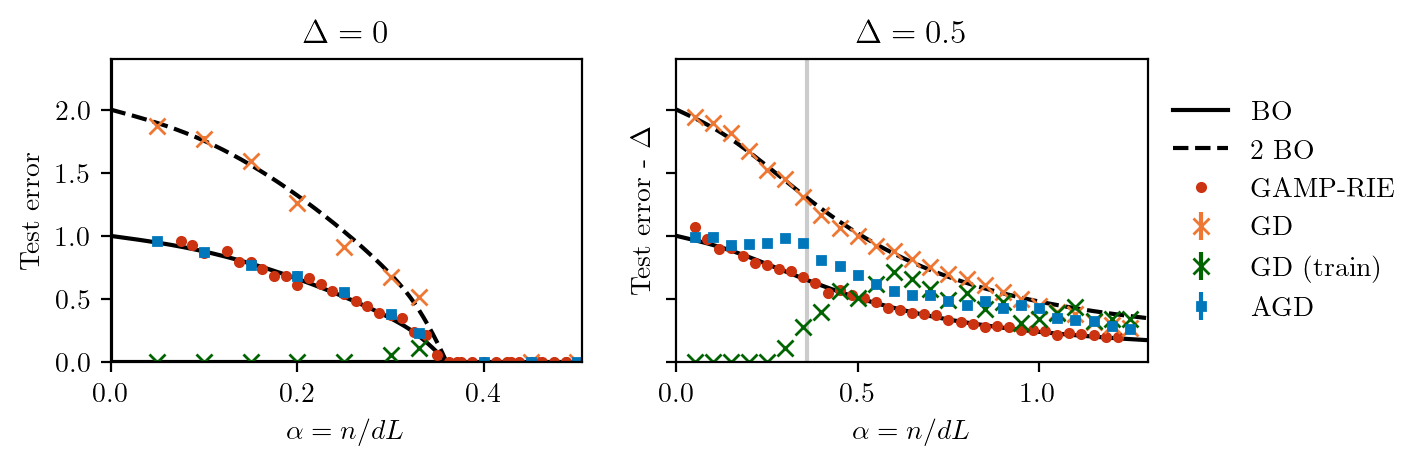

In [60]:
plt.subplots(1, 2, sharex='col', sharey='row', figsize=(cm_to_inch(8.5*2), cm_to_inch(5)))

plt.subplot(1,2,1)
plt.xlabel(r'$\alpha = n/dL$')
plt.ylabel("Test error")


beta =  1.0
rho = 0.2
delta = 0.0
D = 100


plt.xlim(0, 0.505)

color = colors[4]

df = pd.read_csv(f"AMP/AMP_rho_{rho}_beta_{beta}_delta_{delta}_D_{D}.csv")
alpha_sim = df["alpha"].values
gen_error_single = df["mmse"].values
plt.errorbar(alpha_sim, gen_error_single, marker=".", linestyle="", color=color)



df = pd.read_csv(f"GD_data/GD_beta_{beta}_rho_{rho}_delta_{delta}_D_{D}.csv")
alpha_sim = df["alpha"].values
gen_error_sim_mean = df["gen_error_mean"].values
gen_error_sim_std = df["gen_error_std"].values

plt.errorbar(alpha_sim, gen_error_sim_mean, yerr=gen_error_sim_std, label=fr"GD", marker='x', color=colors[3], linestyle='')


df = pd.read_csv(f"GD_data/train_GD_beta_{beta}_rho_{rho}_delta_{delta}_D_{D}.csv")
alpha_sim = df["alpha"].values
gen_error_sim_mean = df["gen_error_mean"].values
gen_error_sim_std = df["gen_error_std"].values
plt.errorbar(alpha_sim, gen_error_sim_mean, yerr=gen_error_sim_std, label=fr"GD", marker='x', color="#006400", linestyle='')


df = pd.read_csv(f"GD_data/AGD_beta_{beta}_rho_{rho}_delta_{delta}_D_{D}.csv")
alpha_sim = df["alpha"].values
gen_error_sim_mean = df["gen_error_mean"].values
gen_error_sim_std = df["gen_error_std"].values
plt.errorbar(alpha_sim, gen_error_sim_mean, yerr=gen_error_sim_std, label=fr"GD avg", marker='s', color=colors[0], linestyle='', markersize=3)


df = pd.read_csv("Fig1/delta_0.0_beta_1.0_rho_[0.1, 0.2, 0.5, 1.0, 2.0]_alpha_0.0_0.005_1.0.csv")
df = df[df["rho"] == rho]
df = df.dropna()

alpha_theory = df["alpha"].values
gen_error_theory = df["mmse"].values 
plt.plot(alpha_theory, gen_error_theory, label="BO", color="black")
plt.plot(alpha_theory, 2*gen_error_theory, label="2 BO", color="black", linestyle="--")


plt.axhline(0, color='black', linestyle='-')
plt.axvline(0, color='black', linestyle='-')


plt.title(r"$\Delta = 0$")
plt.ylim(0,1.2)





plt.subplot(1,2,2)

delta = 0.5
df = pd.read_csv(f"AMP/AMP_rho_{rho}_beta_{beta}_delta_{delta}_D_{100}.csv")
alpha_sim = df["alpha"].values
gen_error_single = df["mmse"].values
plt.errorbar(alpha_sim, gen_error_single, marker=".", linestyle="", color=color, label="GAMP-RIE")


plt.xlabel(r'$\alpha = n/dL$')


delta = 0.5

df = pd.read_csv("MiscTheory/delta_0.5_beta_1.0_rho_[0.2]_alpha_0.0_0.002_2.0.csv")

MMSE = df[df["rho"]==rho][df["beta"]==beta][df["delta"]==delta]["mmse"].values
alphas = df[df["rho"]==rho][df["beta"]==beta][df["delta"]==delta]["alpha"].values
plt.plot(alphas, MMSE, label=fr"BO", color="black")
plt.plot(alphas, 2*MMSE, label=fr"2 BO", color="black", linestyle="--")


df = pd.read_csv(f"GD_data/GD_beta_{beta}_rho_{rho}_delta_{delta}_D_{D}.csv")
alpha_sim = df["alpha"].values
gen_error_sim_mean = df["gen_error_mean"].values
gen_error_sim_std = df["gen_error_std"].values
plt.errorbar(alpha_sim, gen_error_sim_mean, yerr=gen_error_sim_std, label=fr"GD", marker='x', color=colors[3], linestyle='')


df = pd.read_csv(f"GD_data/train_GD_beta_{beta}_rho_{rho}_delta_{delta}_D_{D}.csv")
alpha_sim = df["alpha"].values
gen_error_sim_mean = df["gen_error_mean"].values
gen_error_sim_std = df["gen_error_std"].values
plt.errorbar(alpha_sim, gen_error_sim_mean, yerr=gen_error_sim_std, label=fr"GD (train)", marker='x', color="#006400", linestyle='')


df = pd.read_csv(f"GD_data/AGD_beta_{beta}_rho_{rho}_delta_{delta}_D_{D}.csv")
alpha_sim = df["alpha"].values
gen_error_sim_mean = df["gen_error_mean"].values
gen_error_sim_std = df["gen_error_std"].values
plt.errorbar(alpha_sim, gen_error_sim_mean, yerr=gen_error_sim_std, label=fr"AGD", marker="s", color=colors[0], linestyle='', markersize=3)


plt.xlim(0,1.3)
plt.ylim(0,2.4)

plt.title(r"$\Delta = 0.5$")
plt.ylabel(r"Test error - $\Delta$")

plt.axvline(2*rho - rho**2, zorder=0, color="black", alpha=0.2)

plt.legend(frameon=False, loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig("img/BO_vs_GD.pdf", bbox_inches='tight')




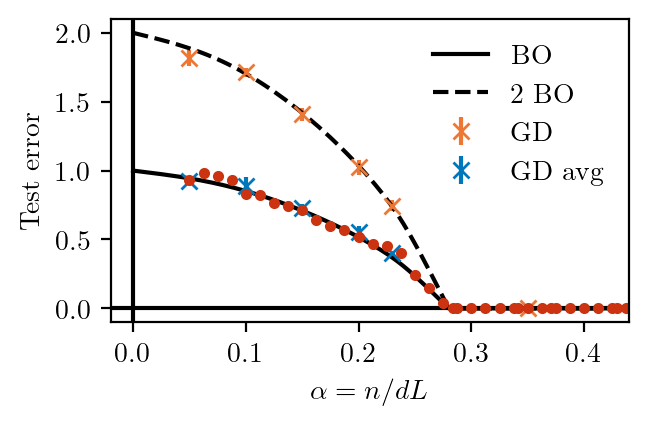

In [69]:
plt.figure(figsize=(cm_to_inch(8.5), cm_to_inch(5)))

rho = 0.2
beta = 2.0
delta = 0.0

D = 100


df = pd.read_csv(f"GD_data/GD_beta_{beta}_rho_{rho}_delta_{delta}_D_{D}.csv")
alpha_sim = df["alpha"].values
gen_error_sim_mean = df["gen_error_mean"].values
gen_error_sim_std = df["gen_error_std"].values
plt.errorbar(alpha_sim, gen_error_sim_mean, yerr=gen_error_sim_std, label=fr"GD", marker='x', color=colors[3], linestyle='')


df = pd.read_csv(f"GD_data/AGD_beta_{beta}_rho_{rho}_delta_{delta}_D_{D}.csv")
alpha_sim = df["alpha"].values
gen_error_sim_mean = df["gen_error_mean"].values
gen_error_sim_std = df["gen_error_std"].values
plt.errorbar(alpha_sim, gen_error_sim_mean, yerr=gen_error_sim_std, label=fr"GD avg", marker='x', color=colors[0], linestyle='')



df = pd.read_csv("MiscTheory/delta_0.5_beta_2.0_rho_[0.2]_alpha_0.0_0.002_2.0.csv")
MMSE = df[df["rho"]==rho][df["beta"]==beta][df["delta"]==delta]["mmse"].values
alphas = df[df["rho"]==rho][df["beta"]==beta][df["delta"]==delta]["alpha"].values
plt.plot(alphas, MMSE, label=fr"BO", color="black")
plt.plot(alphas, 2*MMSE, label=fr"2 BO", color="black", linestyle="--")


df = pd.read_csv(f"AMP/AMP_rho_{rho}_beta_{beta}_delta_{delta}_D_{D}.csv")
alpha_sim = df["alpha"].values
gen_error_single = df["mmse"].values
plt.errorbar(alpha_sim, gen_error_single, marker=".", linestyle="", color=color)



plt.xlim(-0.02, .44)

plt.legend(frameon=False)
plt.axhline(0, color='black', linestyle='-')
plt.axvline(0, color='black', linestyle='-')
plt.xlabel(r"$\alpha= n/d L$")
plt.ylabel("Test error")

plt.savefig("img/BO_vs_GD_rect.pdf", bbox_inches='tight')

# Figure 7

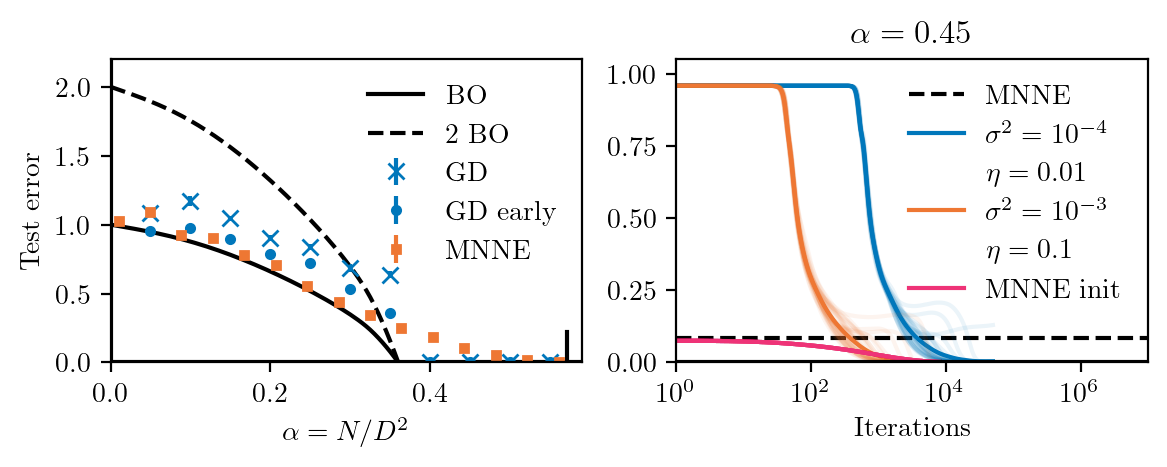

In [78]:
plt.subplots(1, 2, sharex='col', figsize=(cm_to_inch(8.5*2), cm_to_inch(5)))

plt.subplot(1,2,1)



beta = 1.0
delta = 0.0
rho = 0.2

D = 50

df = pd.read_csv(f"GD_data/zero_GD_beta_{beta}_rho_{rho}_delta_{delta}_D_{D}.csv")
alpha_sim = df["alpha"].values
gen_error_sim_mean = df["gen_error_mean"].values
gen_error_sim_std = df["gen_error_std"].values

df = pd.read_csv(f"GD_data/zero_early_GD_beta_{beta}_rho_{rho}_delta_{delta}_D_{D}.csv")
alpha_sim = df["alpha"].values
gen_error_sim_early_mean = df["gen_error_mean"].values
gen_error_sim_early_std = df["gen_error_std"].values

plt.errorbar(alpha_sim, gen_error_sim_mean, yerr=gen_error_sim_std, label=fr"GD", marker='x', color=colors[0], linestyle='')
plt.errorbar(alpha_sim, gen_error_sim_early_mean, yerr=gen_error_sim_early_std, label=fr"GD early", marker='.', color=colors[0], linestyle='')


df = pd.read_csv("Fig1/delta_0.0_beta_1.0_rho_[0.1, 0.2, 0.5, 1.0, 2.0]_alpha_0.0_0.005_1.0.csv")
df = df[df["rho"] == rho]
df = df.dropna()

alpha_theory = df["alpha"].values
gen_error_theory = df["mmse"].values 
plt.plot(alpha_theory, gen_error_theory, label="BO", color="black")
plt.plot(alpha_theory, 2*gen_error_theory, label="2 BO", color="black", linestyle="--")



alpha_list = np.load(f"data_min_norm/alpha_D{D}R{rho}B{beta}.npy")
overlap_list = np.load(f"data_min_norm/MSE_D{D}R{rho}B{beta}.npy")

samples = overlap_list.shape[1]
plt.errorbar(alpha_list, overlap_list.mean(axis=1), overlap_list.std(axis=1)/np.sqrt(samples), marker="s", linestyle=" ", label="MNNE", color=colors[3], markersize = 3)
plt.axvline(x=0.571689921145544, color="black", ymin=0, ymax=.1)


plt.xlim(0, .59)
plt.ylim(0, 2.2)
plt.legend(frameon=False)
plt.axhline(0, color='black', linestyle='-')
plt.axvline(0, color='black', linestyle='-')
plt.xlabel(r"$\alpha=N/D^2$")
plt.ylabel("Test error")


plt.subplot(1,2,2)
plt.xlabel(r'$\alpha = n/dL$')


D = 50
alpha = 0.45
lr = 0.01
gen_error_min_norm = np.load(f"fig_mnne/min_norm_{D}_{alpha}_{rho}_{lr}.npy")
plt.axhline(gen_error_min_norm, color="black", linestyle="--", label="MNNE")

gen_error = np.load(f"fig_mnne/smaller_zero_gen_error_{D}_{alpha}_{rho}_{lr}.npy")

plt.plot(gen_error.mean(axis=0), label=r"$\sigma^2 = 10^{-4}$", color=colors[0])
plt.plot(gen_error.T, color=colors[0], alpha=0.08)
plt.scatter(0.2, 0.4, alpha=0, label=r"$\eta = 0.01$")

lr = 0.1
gen_error = np.load(f"fig_mnne/larger_zero_gen_error_{D}_{alpha}_{rho}_{lr}.npy")

plt.plot(gen_error.mean(axis=0), label=r"$\sigma^2 = 10^{-3}$", color=colors[3])
plt.plot(gen_error.T, color=colors[3], alpha=0.08)
plt.scatter(0.2, 0.4, alpha=0, label=r"$\eta = 0.1$")

lr = 0.01
gen_error = np.load(f"fig_mnne/norm_zero_gen_error_{D}_{alpha}_{rho}_{lr}.npy")

gen_error_longer = np.zeros((gen_error.shape[0], gen_error.shape[1]+1))
gen_error_longer[:, 0] = gen_error_min_norm
gen_error_longer[:, 1:] = gen_error

plt.plot(gen_error_longer.mean(axis=0), label=r"MNNE init", color=colors[5])
plt.plot(gen_error_longer.T, color=colors[5], alpha=0.08)


plt.xscale('log')

plt.xlim(1, 1e7)
plt.ylim((0, 1.05))
plt.xlabel(r'Iterations')
plt.title(r"$\alpha = 0.45$")
plt.legend(frameon=False)

plt.axhline(0, color='black', linestyle='-')

plt.savefig("img/MNNE_vs_GD.pdf", bbox_inches='tight')



# Figure 8

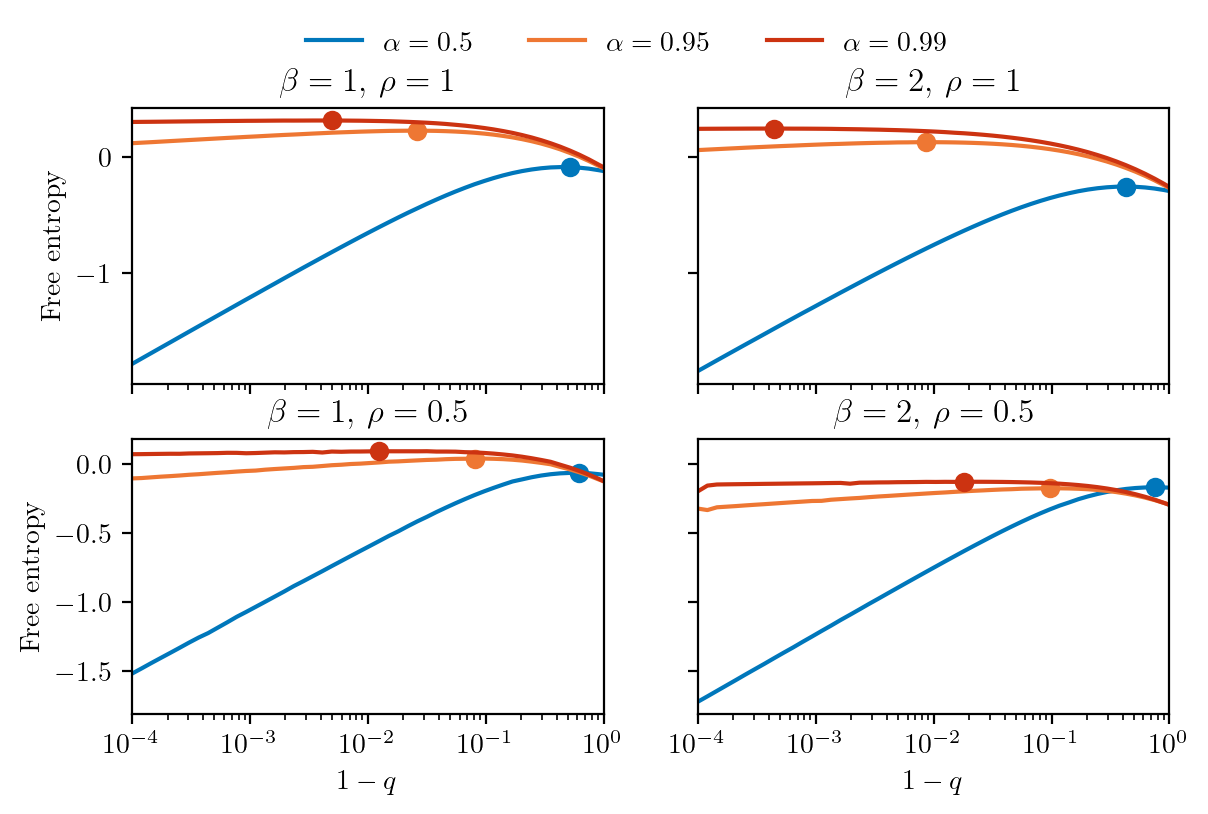

In [80]:
plt.subplots(2, 2, sharex='col', sharey='row', figsize=(cm_to_inch(8.5*2), cm_to_inch(5*2)))
color_idx = [0, 3, 4]


plt.subplot(2, 2, 1)
df = pd.read_csv("Free_entropy/hard_beta_1_rho_1_alphas_[0.5, 0.95, 0.99].csv")

alpha_list = [0.5, 0.95, 0.99]
for i,alpha in enumerate(alpha_list):
    df_use = df[df["alpha"] == alpha]
    q = df_use["q"].values
    fe = df_use["fe"].values

    plt.plot(1-q, fe, label=f"$\\alpha = {alpha}$", color=colors[color_idx[i]])

    idx = np.argmax(fe)
    plt.plot(1-q[idx], fe[idx], marker="o", color=colors[color_idx[i]])

plt.xscale("log")

plt.legend(frameon=False, loc='lower center', bbox_to_anchor=(1.05, 1.1), ncol=3, fontsize=10)

plt.ylabel(r"Free entropy")
plt.title(r"$\beta = 1$, $\rho = 1$")


plt.subplot(2, 2, 2)

df = pd.read_csv("Free_entropy/hard_beta_2_rho_1_alphas_[0.5, 0.95, 0.99].csv")

alpha_list = [0.5, 0.95, 0.99]
for i,alpha in enumerate(alpha_list):
    df_use = df[df["alpha"] == alpha]
    q = df_use["q"].values
    fe = df_use["fe"].values

    plt.plot(1-q, fe, label=f"$\\alpha = {alpha}$", color=colors[color_idx[i]])

    idx = np.argmax(fe)
    plt.plot(1-q[idx], fe[idx], marker="o", color=colors[color_idx[i]])

plt.xscale("log")

plt.xlim(1e-4,1)

plt.title(r"$\beta = 2$, $\rho = 1$")

plt.subplot(2, 2, 3)

df = pd.read_csv("Free_entropy/hard_beta_1_rho_0.5_alphas_[0.35, 0.7, 0.74].csv")

alpha_list = [0.35, 0.7, 0.74]
for i,alpha in enumerate(alpha_list):
    df_use = df[df["alpha"] == alpha]
    q = df_use["q"].values
    fe = df_use["fe"].values

    plt.plot(1-q, fe, label=f"$\\alpha = {alpha}$", color=colors[color_idx[i]])

    idx = np.argmax(fe)
    plt.plot(1-q[idx], fe[idx], marker="o", color=colors[color_idx[i]])

plt.xscale("log")

plt.xlim(1e-4,1)

plt.xlabel(r"$1-q$")
plt.ylabel(r"Free entropy")
plt.title(r"$\beta = 1$, $\rho = 0.5$")


plt.subplot(2, 2, 4)

df = pd.read_csv("Free_entropy/hard_beta_2_rho_0.5_alphas_[0.2, 0.575, 0.615].csv")

alpha_list = [0.2, 0.575, 0.615]
for i,alpha in enumerate(alpha_list):
    df_use = df[df["alpha"] == alpha]
    q = df_use["q"].values
    fe = df_use["fe"].values

    plt.plot(1-q, fe, label=f"$\\alpha = {alpha}$", color=colors[color_idx[i]])

    idx = np.argmax(fe)
    plt.plot(1-q[idx], fe[idx], marker="o", color=colors[color_idx[i]])

plt.xscale("log")

plt.xlabel(r"$1-q$")
plt.title(r"$\beta = 2$, $\rho = 0.5$")

plt.xlim(1e-4,1)

plt.savefig("img/Free_entropy.pdf")

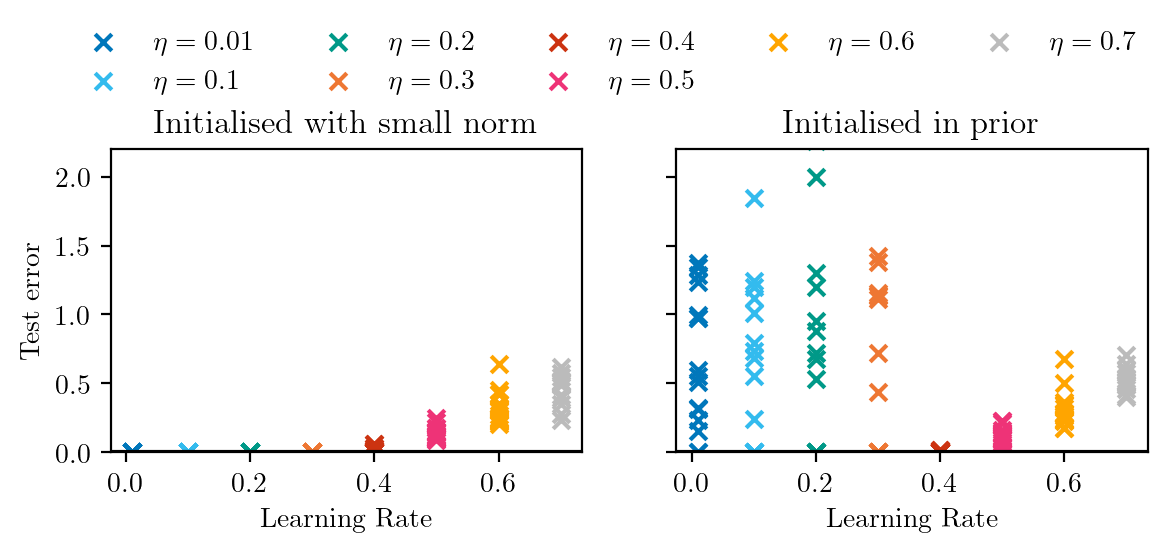

In [87]:
plt.subplots(1,2, sharex='col', sharey='row', figsize=(cm_to_inch(8.5*2), cm_to_inch(5)))

D = 50
rho = 0.2 
alpha = 0.44

if alpha == 0.4:
    min_norm = 1.08060851e-01
    min_norm_std = 4.36752574e-03
elif alpha == 0.44:
    min_norm = 5.04357453e-02
    min_norm_std = 2.49e-03

plt.subplot(1,2,1)


plt.ylabel("Test error")
lr_sim = []
for file in os.listdir("lr_figure"):
    if file.startswith("zero_gen_error"):
        _, _, _, D_file, alpha_file, rho_file, lr_file, = file[:-4].split("_")
        D_file = int(D_file)
        alpha_file = float(alpha_file)
        rho_file = float(rho_file)
        lr_file = float(lr_file)

        if D==D_file and rho==rho_file and alpha==alpha_file:
            lr_sim.append(lr_file)

lr_sim = np.sort(np.array(lr_sim))

gen_error_end = np.zeros((len(lr_sim), 16))
for i,lr in enumerate(lr_sim):
    gen_error_end[i] = np.load(f"lr_figure/zero_gen_error_{D}_{alpha}_{rho}_{lr}.npy")[:,-1]
    plt.scatter(np.ones_like(gen_error_end[i])*lr, gen_error_end[i], label=fr"$\eta = {lr}$", color=colors[i], marker="x")



lr_sim_prior = []
for file in os.listdir("lr_figure"):
    if file.startswith("gen_error"):
        _, _, D_file, alpha_file, rho_file, lr_file = file[:-4].split("_")
        D_file = int(D_file)
        alpha_file = float(alpha_file)
        rho_file = float(rho_file)
        lr_file = float(lr_file)

        if D==D_file and rho==rho_file and alpha==alpha_file:
            lr_sim_prior.append(lr_file)

lr_sim_prior = np.sort(np.array(lr_sim_prior))

plt.xlabel("Learning Rate")
plt.axhline(0, color='black', linestyle='-')

plt.legend(frameon=False, loc='lower center', bbox_to_anchor=(1.05, 1.1), ncol=5, fontsize=10)


plt.title("Initialised with small norm")

plt.subplot(1,2,2)

plt.title("Initialised in prior")

gen_error_end = np.zeros((len(lr_sim_prior), 16))
for i,lr in enumerate(lr_sim_prior):
    gen_error_end[i] = np.load(f"lr_figure/gen_error_{D}_{alpha}_{rho}_{lr}.npy")[:,-1]
    plt.scatter(np.ones_like(gen_error_end[i])*lr, gen_error_end[i], color=colors[i], marker="x")

plt.axhline(0, color='black', linestyle='-')
plt.xlabel("Learning Rate")

plt.ylim(0, 2.2)

plt.savefig("img/learning_rate_compare.pdf", bbox_inches='tight')